### Visualization
#### Plot the bar graph top 15 restaurants have a maximum number of outlets.


In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("zomato.csv", errors = "ignore", encoding = "utf-8") as file:
    file_data = csv.DictReader(file, skipinitialspace = True)
    file_list = list(file_data)
    
zomato = pd.DataFrame(file_list)

In [3]:
def li(i):
    i = i.split(", ")
    return len(i) 

zomato["No of Outlet"] = zomato["Cuisines"].apply(li) 
z_outlet = zomato.groupby("Restaurant Name")["Cuisines","No of Outlet"].sum()
z_outlet = z_outlet.sort_values(by = "No of Outlet", ascending = False)[:15]

<ipython-input-3-55a2d94bccfa>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  z_outlet = zomato.groupby("Restaurant Name")["Cuisines","No of Outlet"].sum()


In [4]:
arr_n = []
for i in z_outlet["No of Outlet"]:
    arr_n.append(i)
    
arr_r = []
for i in z_outlet.index:
    arr_r.append(i)

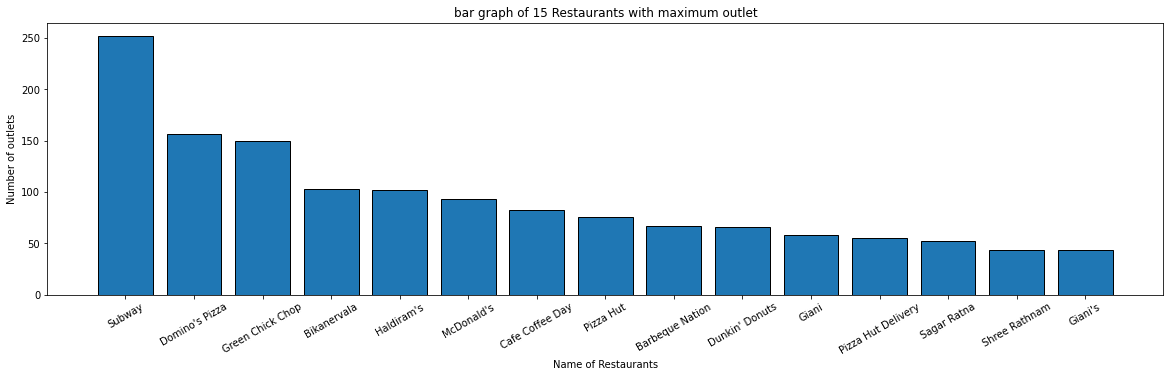

In [5]:
#plot graph
plt.subplots(figsize = (20, 5))
plt.bar(arr_r, arr_n, edgecolor = "Black")
plt.xticks(rotation = 30)
plt.title("bar graph of 15 Restaurants with maximum outlet")
plt.xlabel("Name of Restaurants")
plt.ylabel("Number of outlets")
plt.show()

#### Plot the histogram of aggregate rating of restaurant

In [6]:
dict_rating = {} #Dict of Ratings and number of Ratings
for i in zomato["Aggregate rating"]:
    i = float(i)
    if i!= 0:
        dict_rating[i] = dict_rating.get(i, 0)+1
        
arr_rating = []
arr_score = []

for i in dict_rating:
    arr_rating.append(i)
    arr_score.append(dict_rating[i])

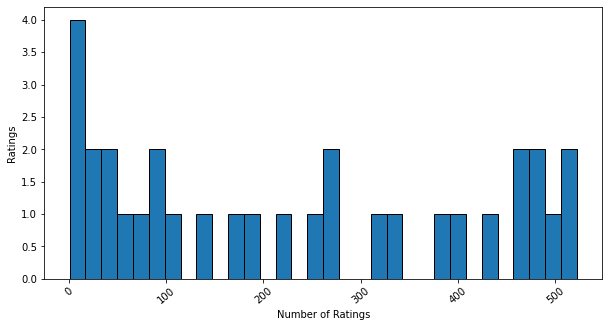

In [7]:
#plot graph
plt.subplots(figsize = (10,5 ))
plt.hist(arr_score, edgecolor = "Black", bins = 32)
plt.xlabel("Number of Ratings")
plt.ylabel("Ratings")
plt.xticks(rotation = 40)
plt.show()

#### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

In [8]:
def d(i):
    return int(float(i))

zomato["votes"] = zomato["Votes"].apply(d) 
res = zomato.groupby('Restaurant Name')['votes'].sum().sort_values(ascending=False)[0:10]
Restaurant_Name = res.index #List of Restaurants
votes_count = res.values #list of votes

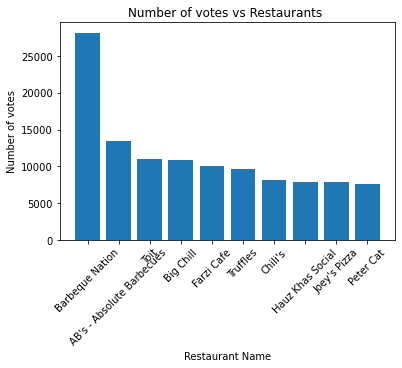

In [9]:
#plot graphs
plt.bar(Restaurant_Name, votes_count)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of votes")
plt.xticks(rotation = 45)
plt.title("Number of votes vs Restaurants ")
plt.show()

#### Plot the pie graph of top 10 cuisines present in restaurants in the USA

In [10]:
z_usa = zomato[zomato["Country Code"] == "216"] #USA country code = 216

In [11]:
dict_usa = {} #Dict of cuisines and count

for i in z_usa["Cuisines"]:
    l = i.split(", ")
    for j in l:
        if j != "":
            dict_usa[j] = dict_usa.get(j, 0) + 1
dict_usa  = {key: value for key, value in sorted(dict_usa.items(), key=lambda item: item[1], reverse = True)}

arr = []
arr_name = []
count = 0
for i in dict_usa:
    arr.append(dict_usa[i])
    arr_name.append(i)
    count +=1
    if  count == 10:
        break;

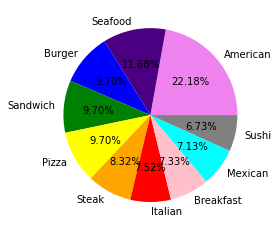

In [12]:
#plot graph
c = ["violet", "indigo", "blue", "green","yellow", "orange", "red", "pink", "cyan", "grey"]
plt.pie(arr, labels = arr_name, autopct = "%.2f%%", colors = c)
plt.show()

#### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [13]:
z_ind = zomato[zomato["Country Code"] == "1"] #india country code is 1

In [14]:
def dtype(i): #Coverting the data type
    return float(i)
    
z_ind["Aggregate Rating"] = z_ind["Aggregate rating"].apply(dtype)

<ipython-input-14-01460405dc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_ind["Aggregate Rating"] = z_ind["Aggregate rating"].apply(dtype)


In [15]:
a = z_ind["Aggregate Rating"] * z_ind["votes"] #Creating a column of Rating * votes
z_ind["Weighted"] = a

total_votes = 0
for i in z_ind["votes"]:
    total_votes+=i

<ipython-input-15-50983daef6bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_ind["Weighted"] = a


<ipython-input-16-7934039cb161>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  z_test1 = z_ind.groupby("City")["votes", "Weighted"].sum() #Using groupby in votes weightage and city name


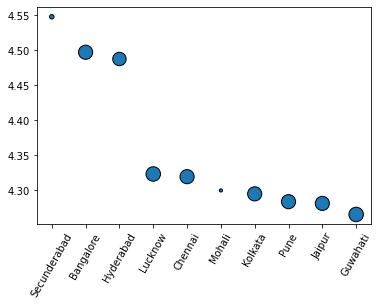

In [16]:
z_test1 = z_ind.groupby("City")["votes", "Weighted"].sum() #Using groupby in votes weightage and city name

c_count = z_ind.groupby(by = 'City')["Restaurant ID"].agg('count').values #groupby with count to get weightage
c_name = z_test1.index
city_weight = []

for i in z_test1.values: #Weightage of each city
    k = i[1]/i[0]
    city_weight.append(k)
    
d = {}

for i in range(len(c_name)):
    d[city_weight[i]] = d.get(0, (c_name[i], c_count[i]))
    
d  = {key: value for key, value in sorted(d.items(), reverse = True)[:10]}
c_name = []
c_count = []
city_weight = []

for i in d:
    city_weight.append(i)
    c_name.append(d[i][0])
    c_count.append(d[i][1]*10) #Multiply by 10 to get a visible bubble

plt.scatter(c_name, city_weight, s = c_count, edgecolor = "Black")
plt.xticks(rotation = 60)
plt.show()